e-31-PCA-Percentile
==
- 주성분 분석
- 30% 중요 데이터만 사용 SelectPercentile
- tSNE 

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn import feature_selection
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test =train_test_split(data.data,data.target,test_size=0.2)

In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
# data.DESCR

In [6]:
# print(data.DESCR)

In [7]:
# data.feature_names

In [8]:
rfc = RandomForestClassifier(n_estimators=300) 
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.9736842105263158

In [9]:
X_train=pd.DataFrame(X_train,columns=data.feature_names)

In [10]:
fs = SelectPercentile(feature_selection.chi2, percentile = 20)
X_train_P = fs.fit_transform(X_train, y_train)
columns_new=X_train.columns[fs.get_support()] 
# 아래에서 설명함

In [11]:
X_test_P = fs.transform(X_test)

In [12]:
rfc_P = RandomForestClassifier(n_estimators=300) 
rfc_P.fit(X_train_P, y_train)
rfc_P.score(X_test_P,y_test)

0.9824561403508771

In [13]:
t = np.random.randn(5).round(2)
t

array([-0.71, -0.52, -0.38,  0.63,  1.01])

In [14]:
map = t > 0 ; map

array([False, False, False,  True,  True])

In [15]:
t[map]

array([0.63, 1.01])

In [16]:
fs.get_support()

array([False, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False])

In [17]:
columns_new

Index(['mean perimeter', 'mean area', 'area error', 'worst radius',
       'worst perimeter', 'worst area'],
      dtype='object')

In [18]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,15.49,19.97,102.40,744.7,0.11600,0.15620,0.18910,0.09113,0.1929,0.06744,...,21.20,29.41,142.10,1359.0,0.1681,0.39130,0.55530,0.21210,0.3187,0.10190
1,11.15,13.08,70.87,381.9,0.09754,0.05113,0.01982,0.01786,0.1830,0.06105,...,11.99,16.30,76.25,440.8,0.1341,0.08971,0.07116,0.05506,0.2859,0.06772
2,12.31,16.52,79.19,470.9,0.09172,0.06829,0.03372,0.02272,0.1720,0.05914,...,14.11,23.21,89.71,611.1,0.1176,0.18430,0.17030,0.08660,0.2618,0.07609
3,16.35,23.29,109.00,840.4,0.09742,0.14970,0.18110,0.08773,0.2175,0.06218,...,19.38,31.03,129.30,1165.0,0.1415,0.46650,0.70870,0.22480,0.4824,0.09614
4,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,...,20.96,29.94,151.70,1332.0,0.1037,0.39030,0.36390,0.17670,0.3176,0.10230


In [19]:
X_train.shape

(455, 30)

In [21]:
X_train_P=pd.DataFrame(X_train_P,columns=columns_new)

In [22]:
X_train_P[:5]

,mean perimeter,mean area,area error,worst radius,worst perimeter,worst area
0,102.40,744.7,66.91,21.20,142.10,1359.0
1,70.87,381.9,15.48,11.99,76.25,440.8
2,79.19,470.9,19.68,14.11,89.71,611.1
3,109.00,840.4,45.50,19.38,129.30,1165.0
4,132.40,1123.0,116.20,20.96,151.70,1332.0


In [23]:
X_train_P.shape

(455, 6)

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

In [25]:
X = data.data
target = data.target

In [26]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

In [27]:
pca_result[:3], pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([[1160.1425737 , -293.91754364],
        [1269.12244319,   15.63018184],
        [ 995.79388896,   39.15674324]]),
 array([0.98204467, 0.01617649]),
 0.9982211613741719)

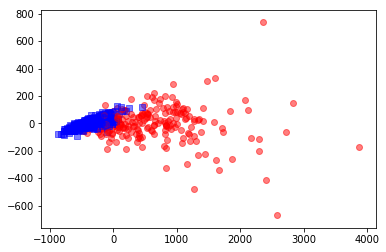

In [28]:
m = ['o', 's']
c = ['red','blue']
for i in range(len(target)):
    plt.scatter(pca_result[:,0][i],pca_result[:,1][i], marker=m[target[i]], c=c[target[i]], alpha=0.5)
plt.show()

In [29]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679705
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.099121
[t-SNE] Error after 1000 iterations: 0.211998


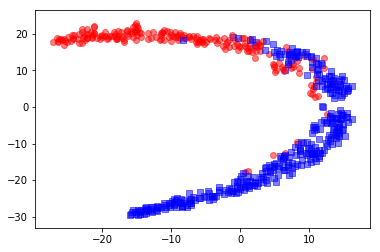

In [30]:
m = ['o', 's']
c = ['red','blue']
for i in range(len(target)):
    plt.scatter(tsne_results[:,0][i],tsne_results[:,1][i], marker=m[target[i]], c=c[target[i]], alpha=0.5)
plt.show()

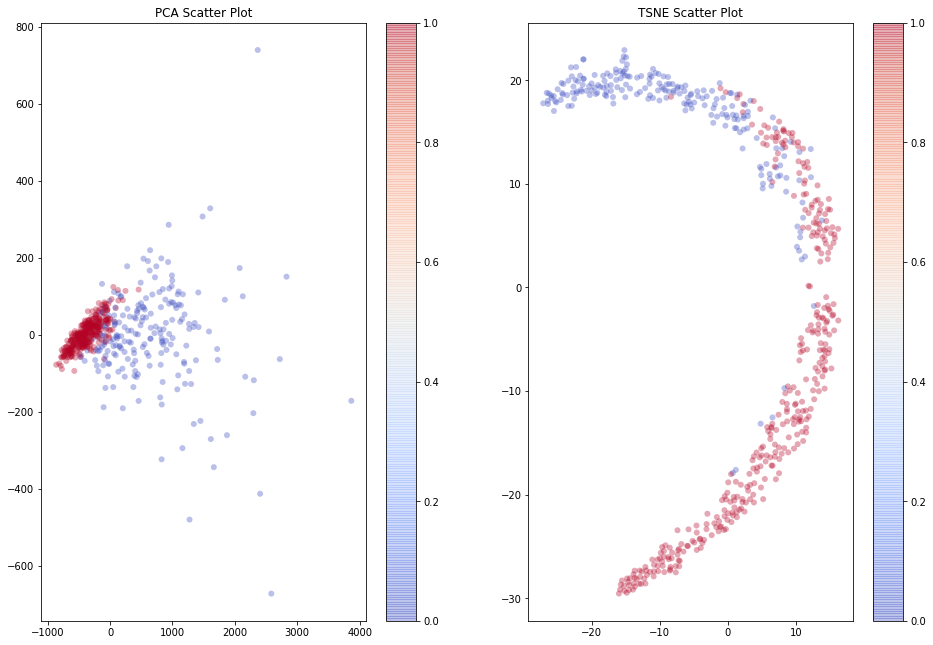

In [31]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_result[:,0],pca_result[:,1], c = data.target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results[:,0],tsne_results[:,1],  c = data.target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

### 표준화 후 시각화

In [32]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [33]:
pca = PCA(n_components=2)
pca_2d_std = pca.fit_transform(X_std)

In [34]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results_std = tsne.fit_transform(X_std)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.050s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.304878
[t-SNE] Error after 1500 iterations: 0.878308


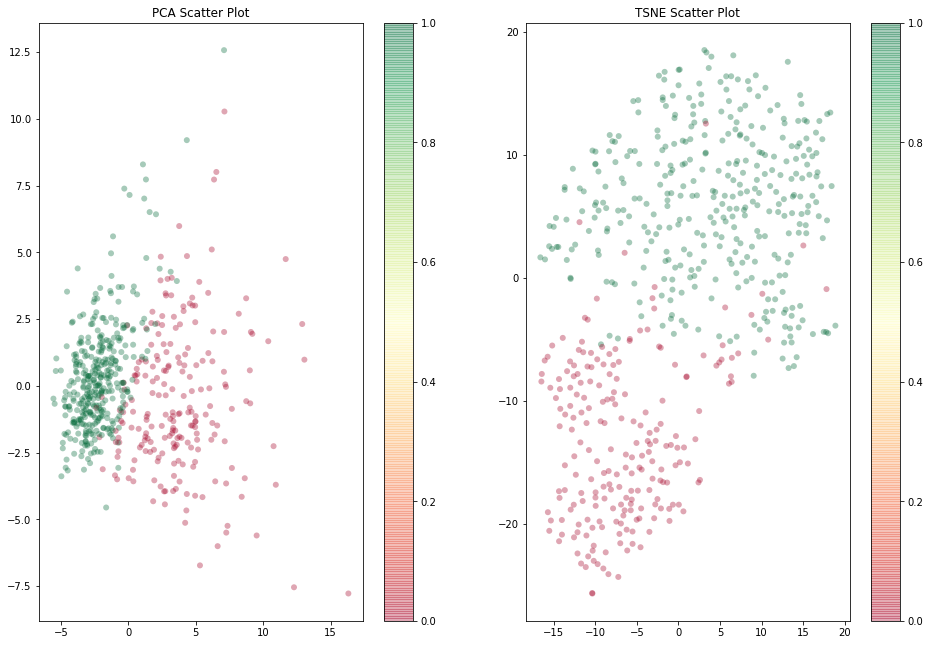

In [35]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_2d_std[:,0],pca_2d_std[:,1], c = data.target, 
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results_std[:,0],tsne_results_std[:,1],  c = data.target, 
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()